## **California Housing Price**

[Sumber data California Housing Price](https://www.kaggle.com/datasets/camnugent/california-housing-prices) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

### **Context**

California adalah sebuah negara bagian di Amerika Serikat bagian barat. Dengan jumlah penduduk lebih dari 39,2 juta jiwa dan total area sekitar 163.696 mil persegi (423.970 km2), California merupakan negara bagian Amerika Serikat yang terpadat berdasarkan kepadatan penduduk dan terbesar ketiga berdasarkan wilayah. Perekonomian California, dengan produk domestik bruto (PDB) sebesar US$3,4 triliun pada 2021 menjadikannya sebagai ekonomi sub-nasional terbesar di dunia. California juga merupakan rumah bagi beberapa perusahaan terbesar di dunia berdasarkan kapitalisasi pasar dan tempat tinggal orang terkaya di dunia.

Perekonomian yang maju menjadikan California sebagai salah satu kota dengan market properti yang paling mahal dan kompetitif di Amerika Serikat. Pertumbuhan jumlah masyarakat (baik lokal maupun expats), luas tanah yang terbatas, dan permintaan yang tinggi membuat harga rumah di California meroket. Harga rumah di California sangat tinggi dan sulit dijangkau bagi sebagian besar penduduk. Banyak orang yang ingin membeli rumah, tetapi sulit menemukan yang terjangkau dan kualitasnya baik. Hal ini membuat banyak orang berpotensi tidak memiliki tempat tinggal yang layak.



### **Problem Statement**

Dengan meningkatnya popularitas dan demand terhadap properti di California dalam setidaknya satu dekade terakhir, pemilik rumah dapat menaikkan harga jual rumah secara berlebihan dan sering kali melebihi value rumah tersebut. Lebih parahnya, ini menciptakan domino effect kepada pemilik properti lainnya. Akibatnya, terjadi inflasi yang tinggi di sektor properti di wilayah California. 

Salah satu tantangan terbesar bagi pemerintah adalah bagaimana pemerintah dapat mencegah 'housing bubble' seperti yang terjadi pada tahun 2008 dengan cara mengedukasi masyarakat mengenai value rumah dan membuat kebijakan (jika diperlukan) mengenai pengaturan harga rumah di wilayah California. Ketidakstabilan pada harga rumah dapat memperlebar kesenjangan sosial masyarakat, yang artinya adanya perbedaan jarak ekonomi antara satu kelompok dengan kolompok lainnya. Yang sudah mempunyai properti akan semakin sejahtera, dan yang belum memiliki properti akan menjadi lebih kesulitan dalam memperoleh sebuah properti. Oleh karena itu, **sangatlah penting untuk pemerintah dapat mengedukasi masyarakat dan membuat kebijakan yang mengatur harga properti secara adil, akurat dan kompetitif sesuai dengan value rumah tersebut**

### **Goals**

Berdasarkan permasalahan tersebut, saya sebagai data analyst yang bekerja di divisi data pada pemerintahan, bekerja sama dengan menteri perekonomian dan menteri sosial, ingin membuat sebuah 'tool' yang dapat **mengevaluasi value sebuah rumah di California secara objektif**. Insights yang dihasilkan dari prediction tool ini diharapkan dapat dijadikan pedoman untuk aksi pemerintah ke depannya, baik dalam penentuan kebijakan pengendalian harga rumah, pengedukasian masyarakat tentang sektor perumahan, maupun meningkatkan akses informasi mengenai perumahan yang terjangkau untuk masyarakat.

Dengan terjaganya kesejahteraan masyarakat dan perekonomian di wilayah California, ini dapat meningkatkan stabilitas ekonomi Amerika Serikat secara keseluruhan. 


### **Analytic Approach**

Kita perlu menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu pemerintah dalam membuat keputusan berdasarkan hasil prediksi valuasi rumah di California


### **Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga properti sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

****

## **Import Library**

In [503]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import scipy.stats as stats

import folium

import warnings
warnings.filterwarnings('ignore')

## **Data Understanding**

- Dataset merupakan data statistik mengenai lingkungan perumahan di kota California pada tahun 1990.
- Setiap baris data merepresentasikan informasi terkait suatu blok perumahan beserta detail-detailsnya

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Integer | A measure of how far west a house is; a higher value is farther west |
| latitude | Integer | A measure of how far north a house is; a higher value is farther north |
| housing_median_age | Integer | Median age of a house within a block; a lower number is a newer building |
| total_rooms | Integer | Total number of rooms within a block |
| total_bedrooms | Integer | Total number of bedrooms within a block |
| population | Integer | Total number of people residing within a block |
| households | Integer | Total number of households, a group of people residing within a home unit, for a block |
| median_income| Integer | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| ocean_proximity | Object | Location of the house with respect to ocean/sea |
| median_house_value | Integer | median house value in US dollars |


<br>

In [504]:
df = pd.read_csv('data_california_house.csv')
print('Berikut 5 baris teratas dan terbawah dari dataset California Housing Price.')
display(df.head(),df.tail())

Berikut 5 baris teratas dan terbawah dari dataset California Housing Price.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14447,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


In [505]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (14448, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [506]:
display(df.describe(),df.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


Secara umum, kita bisa melihat bahwa:
* Dataset 'California Housing Price' memiliki 10 kolom dan 14448 baris 
* Dari 10 kolom, terdapat 9 kolom numerikal dan 1 kolom kategorikal
* Hanya 1 kolom, yaitu, kolom `total_bedrooms` yang memiliki data kosong

### Handle Missing Value

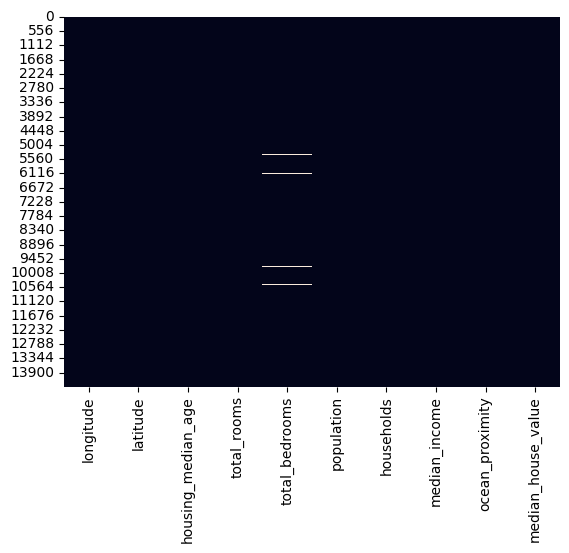

In [507]:
# Missing value heatmap
sns.heatmap(df.isnull(), cbar=False);

In [508]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [509]:
df[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


Data kosong pada kolom `total_bedrooms` diwakili dengan data NaN. Jika dilihat dari jumlah data NaN, yaitu sebanyak 137 dari total 14448 baris (sekitar ~0.9% dari total data), maka kita bisa katakan jumlah data NaN tidak terlalu signifikan, sehingga saat menganalisa kolom `total_bedrooms` ini kita bisa hapus saja baris dengan data NaN.

In [510]:
df.dropna(inplace=True)

In [511]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (14311, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14311 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14311 non-null  float64
 1   latitude            14311 non-null  float64
 2   housing_median_age  14311 non-null  float64
 3   total_rooms         14311 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14311 non-null  float64
 6   households          14311 non-null  float64
 7   median_income       14311 non-null  float64
 8   ocean_proximity     14311 non-null  object 
 9   median_house_value  14311 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


Setelah kita drop baris dengan NaN values, kita memiliki dataset baru dengan 14311 baris dan 10 kolom

### Cek Data Duplikasi

In [512]:
# Cek data duplikat
df.duplicated().sum()

0

Dataset kita tidak memiliki data duplikasi

### **DATA KATEGORIKAL**
Pada dataset ini hanya ada 1 kolom kategorikal yaitu kolom 'ocean_proximity'

In [513]:
# Cek jumlah properti berdasarkan proximity to ocean
print(f"Jumlah properti berdasarkan proximity to ocean:\n{df['ocean_proximity'].value_counts()}")

Jumlah properti berdasarkan proximity to ocean:
<1H OCEAN     6300
INLAND        4544
NEAR OCEAN    1855
NEAR BAY      1610
ISLAND           2
Name: ocean_proximity, dtype: int64


[Klik disini untuk melihat/mempelajari Peta California](https://www.tripsavvy.com/interactive-map-of-california-sights-1478372)

Dari peta diatas, kita bisa pelajari bahwa sisi barat dari California langsung berbatasan dengan laut

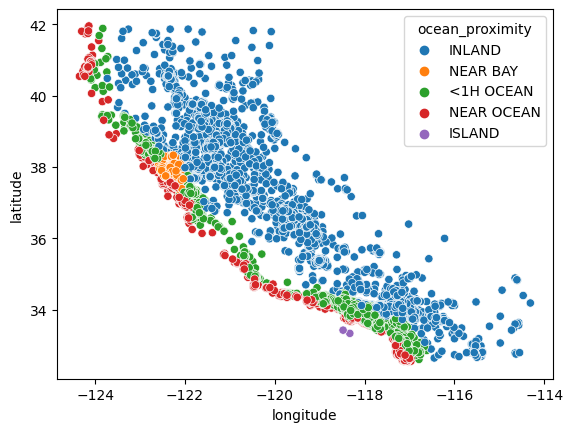

In [514]:
sns.scatterplot(data=df, x=df['longitude'], y=df['latitude'], hue=df['ocean_proximity'])
plt.show()

Dari plot peta diatas, kita bisa menyimpulkan bahwa urutan dari kategori `ocean proximity` dari yang terdekat ke laut ke yang terjauh ke laut adalah sebagai berikut:
1. Island
2. Near Ocean
3. <1H Ocean
4. Near Bay 
5. Inland

Text(0.5, 1.0, 'Total number of blocks based on ocean proximity')

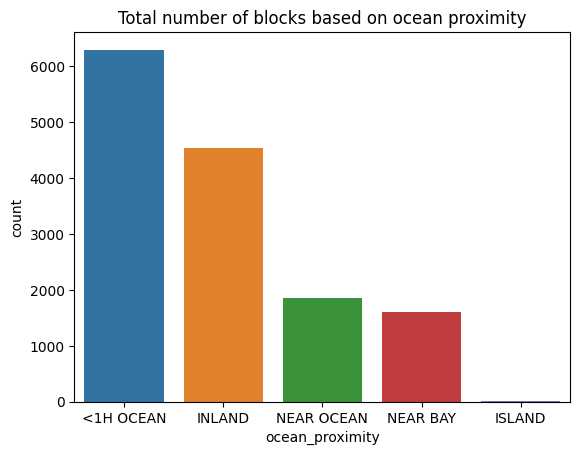

In [515]:
sns.countplot(data=df, x='ocean_proximity', order=df['ocean_proximity'].value_counts().index)
plt.title('Total number of blocks based on ocean proximity')

Dilihat dari grafik diatas, jumlah blok terbanyak berada bada kategori <1H OCEAN, diikuti oleh kategori INLAND. Ini masuk akal karena jumlah blok yang NEAR OCEAN dan NEAR BAY pada suatu kota jumlahnya terbatas

Text(0.5, 1.0, 'Median_house_value in California')

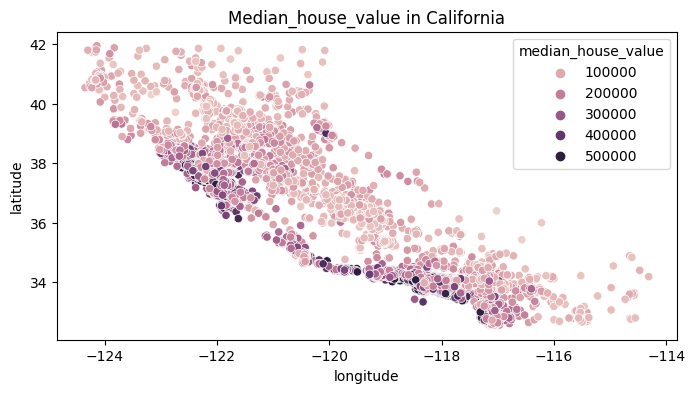

In [516]:
# Plot Median house value in California

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x=df['longitude'], y=df['latitude'], hue=df['median_house_value']).set_title('Median_house_value in California')

Peta diatas merupakan peta median value rumah pada suatu blok berdasarkan proximity-nya ke laut. Median harga rumah yang lebih mahal ditandai dengan warna yang lebih gelap. Jika dilihat dari grafik di atas, rumah yang berada pada blok yang dekat ke laut (lebih ke kiri) cenderung lebih mahal dibandingkan rumah yang berada pada blok yang berada di perkotaan (lebih ke kanan)

In [517]:
# Cek median price untuk tiap group berdasarkan proximity to ocean
df_median_price = df.groupby(by=['ocean_proximity']).agg({'median_house_value':'median'}).reset_index()
df_median_price = df_median_price.set_index('ocean_proximity')
df_median_price = df_median_price.sort_values('median_house_value', ascending =False)
df_median_price.head()

,median_house_value
ocean_proximity,
ISLAND,351100.0
NEAR BAY,230800.0
NEAR OCEAN,228100.0
<1H OCEAN,215100.0
INLAND,108800.0


## **DATA NUMERIKAL**

Pada dataset ini, kita memiliki 9 kolom numerikal yaitu:
* Latitude
* Longitude
* Housing Median Age
* Total Rooms	
* Total Bedrooms	
* Population	
* Households	
* Median Income	
* Median House Value

In [518]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


Pertama-tama, kita mau melihat persebaran data dari kolom2 numerikal, kecuali kolom latitude dan longitude karena value pada kedua kolom, secara domain knowledge dinilai tidak relevan untuk pemahaman kita dalam memprediksi harga rumah di California. 

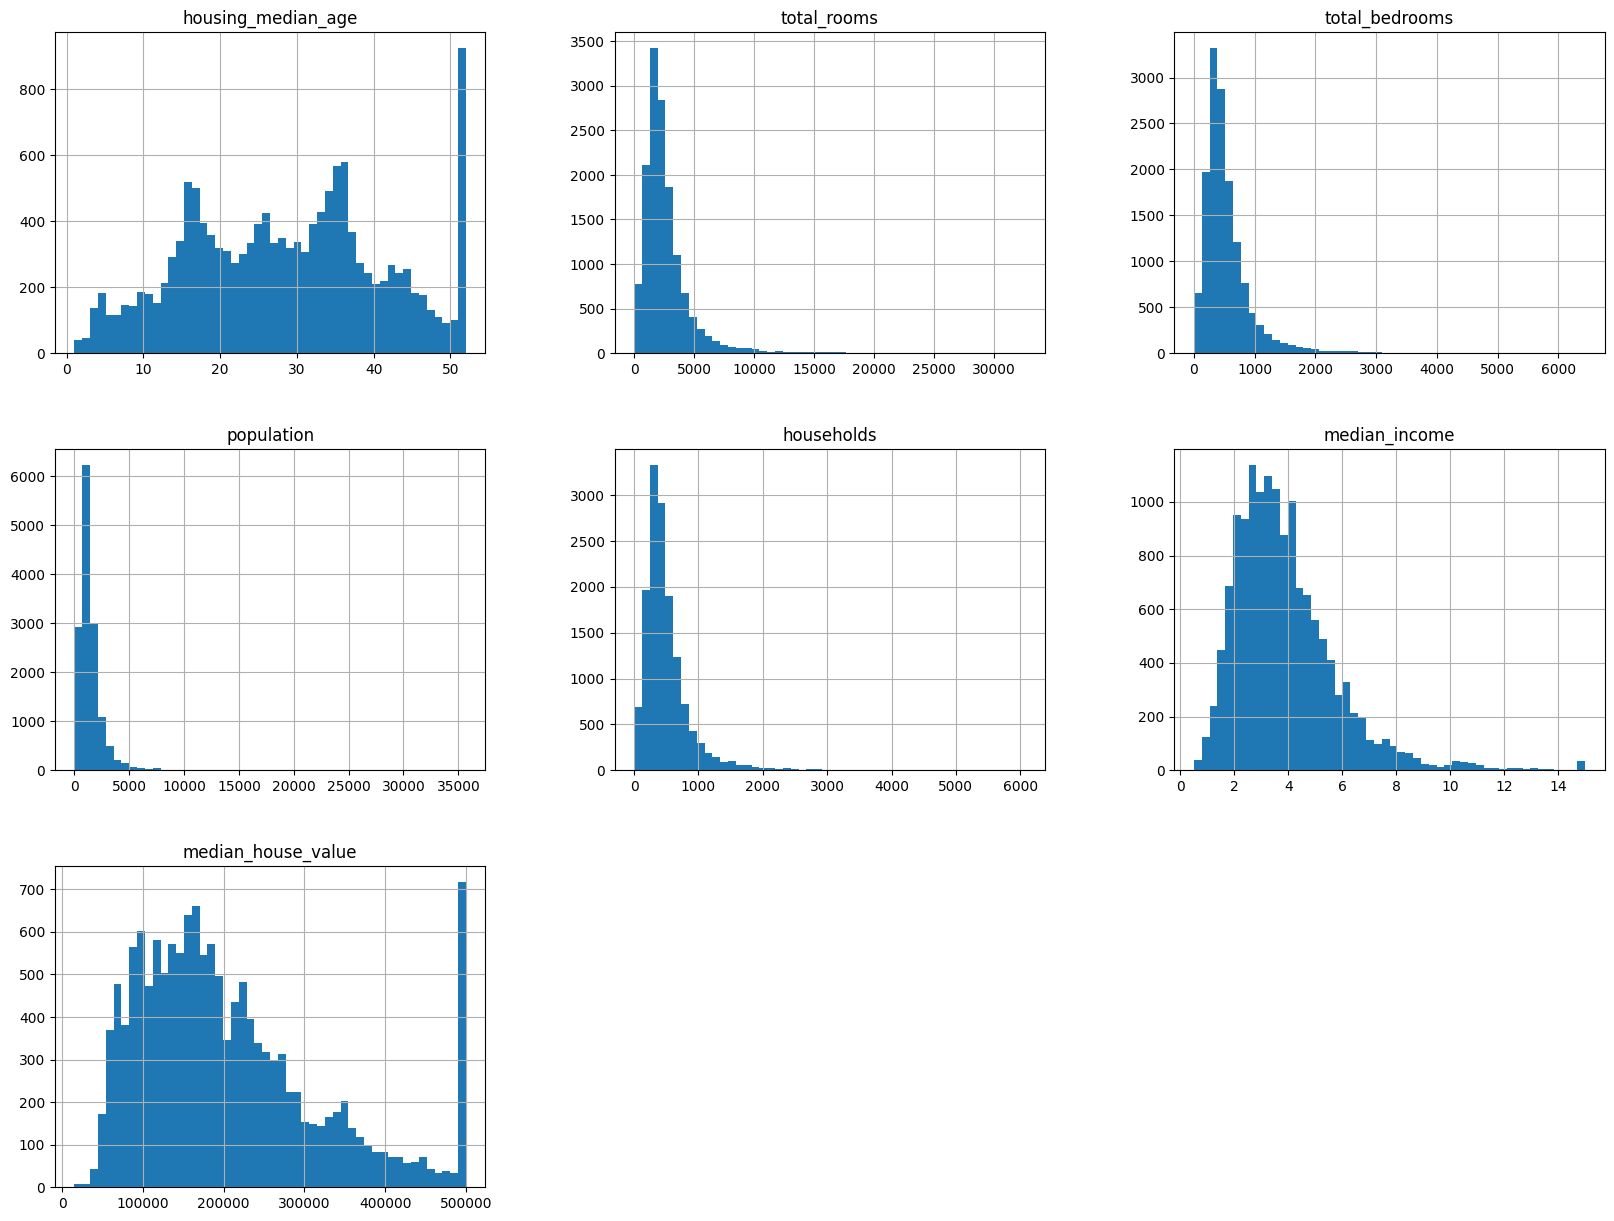

In [519]:
#
df.drop(columns=['longitude','latitude']).hist(bins=50, figsize=(20,15)) #bins is the number of bars in the histogram
plt.show()

In [520]:
display(df.describe(),df.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14311
unique,5
top,<1H OCEAN
freq,6300


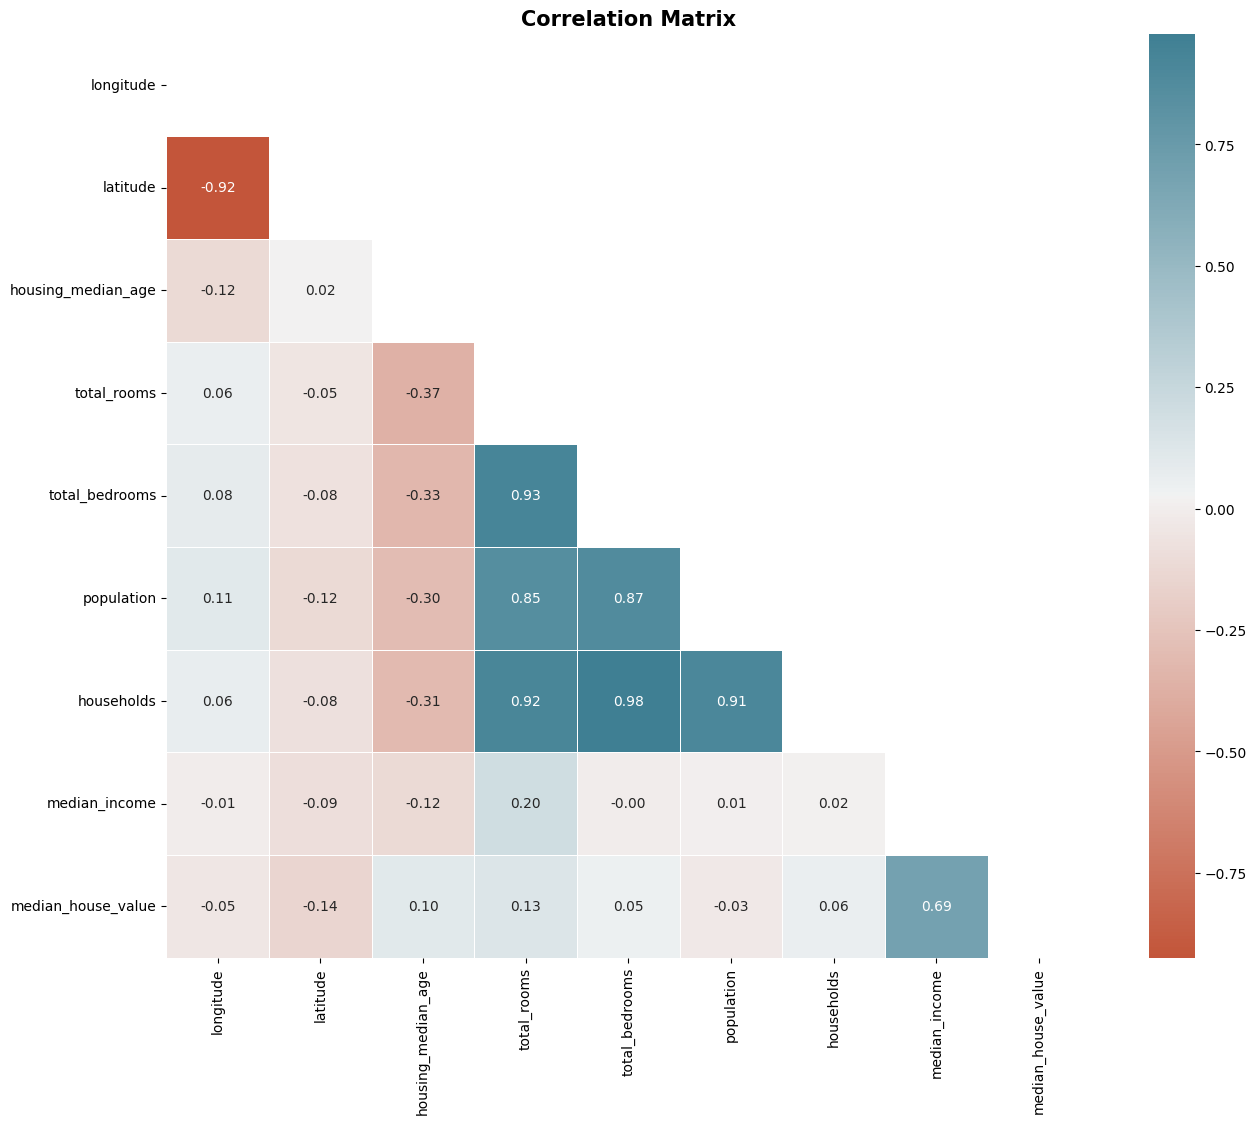

In [521]:
# Correlation matrix

mask = np.triu(np.ones_like(df[['longitude','latitude',	'housing_median_age','total_rooms',	'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']].corr(method='pearson')))

plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, mask=mask, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa hanya fitur 'median_income' yang memiliki korelasi yang kuat terhadap fitur 'median_house_value'.

Selain itu, ada korelasi yang tinggi antara fitur households, population, total rooms, dan total bedrooms. Ini masuk akal karena dengan bertambahnya population , households yang terbentuk juga cenderung semakin banyak, dan total rooms dan bedrooms yang diperlukan juga bertambah. 

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

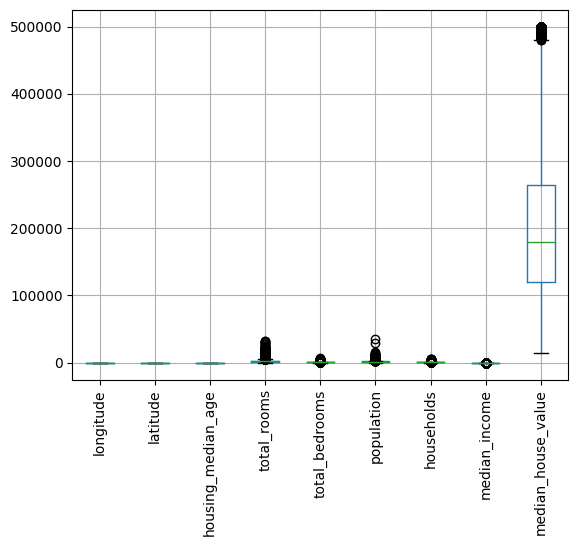

In [522]:
# Plot boxplot untuk mengecek outliers
df.boxplot(rot=90);

Terlihat banyak sekali outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [523]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

In [524]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [525]:
# Outliers pada fitur median house value
find_anomalies(df['median_house_value'])

IQR: 144350.0
limit_bawah: -97125.0
limit_atas: 480275.0


In [526]:
# Outliers pada fitur median house age
find_anomalies(df['housing_median_age'])

IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5


In [527]:
# Outliers pada fitur total rooms
find_anomalies(df['total_rooms'])

IQR: 1690.0
limit_bawah: -1083.0
limit_atas: 5677.0


In [528]:
# Outliers pada fitur total bedrooms
find_anomalies(df['total_bedrooms'])

IQR: 352.0
limit_bawah: -233.0
limit_atas: 1175.0


In [529]:
# Outliers pada fitur population
find_anomalies(df['population'])

IQR: 938.0
limit_bawah: -623.0
limit_atas: 3129.0


In [530]:
# Outliers pada fitur households
find_anomalies(df['households'])

IQR: 324.5
limit_bawah: -207.75
limit_atas: 1090.25


In [531]:
# Outliers pada fitur median income
find_anomalies(df['median_income'])

IQR: 2.1667000000000005
limit_bawah: -0.6806500000000009
limit_atas: 7.986150000000001


Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**Median House Value**

In [532]:
# Cek deskriptif statistik kolom median_house_value
df['median_house_value'].describe()

count     14311.000000
mean     206793.156942
std      115404.371629
min       14999.000000
25%      119400.000000
50%      180000.000000
75%      263750.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [533]:
# Cek median_house_value > $480275
df[df['median_house_value'] > 480275].count()['median_house_value']

751

Terlihat bahwa 75% data pada kolom median_house_value bernilai kurang dari USD 263750, sedangkan nilai maksimalnya adalah USD 500001. Terdapat 751 data (atau sekitar 5% dari data) yang nilai median_house_value lebih besar dari USD 480275 (batas atas berdasarkan metode IQR). Karena jumlahnya tergolong kecil, data yang memiliki median_house_value lebih besar dari USD 480275 tidak akan dimasukkan ke dalam pemodelan. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

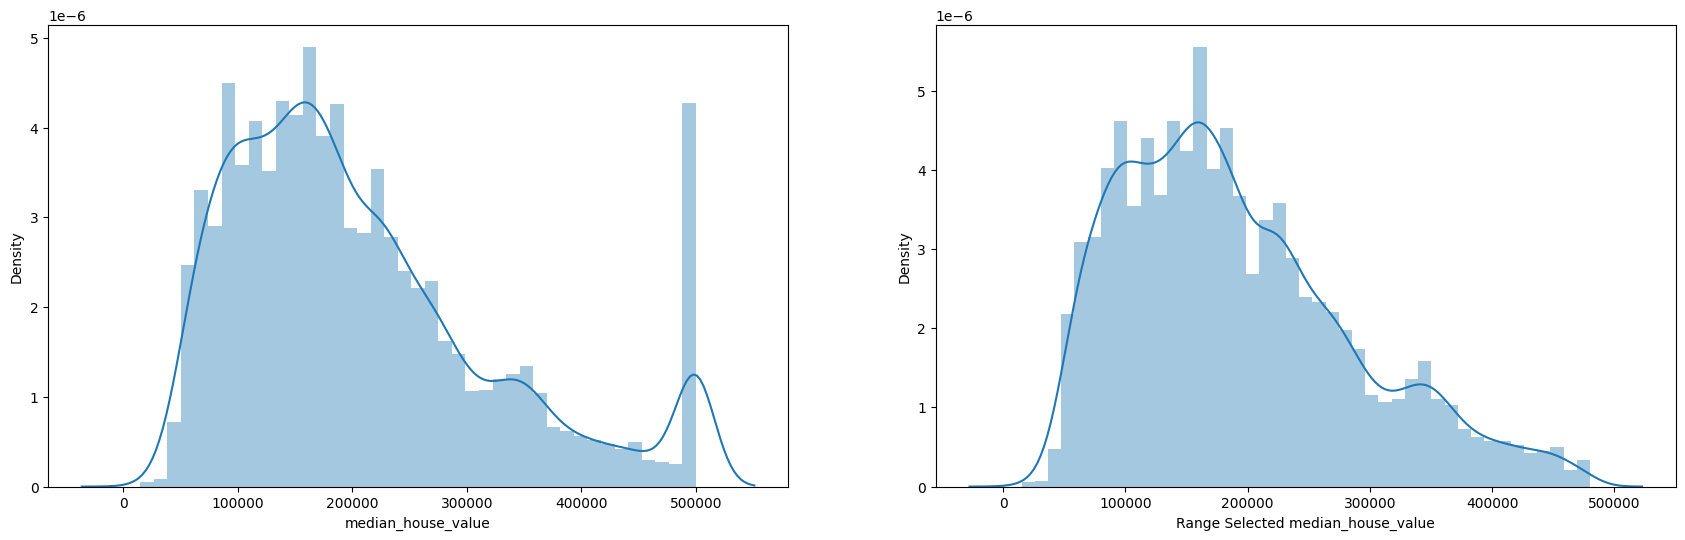

In [534]:
# Melakukan filtering pada data
df_model = df[(df['median_house_value'] <= 480275)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(df_model['median_house_value'], ax=axes[1])
axes[0].set_xlabel('median_house_value')
axes[1].set_xlabel('Range Selected median_house_value');

In [535]:
# Cek deskriptif statistik kolom 'median_housing_value' setelah filtering
df_model['median_house_value'].describe()

count     13560.000000
mean     190602.086799
std       95180.551359
min       14999.000000
25%      116200.000000
50%      173350.000000
75%      246000.000000
max      480100.000000
Name: median_house_value, dtype: float64

**Median House Age**

In [536]:
# Cek deskriptif statistik kolom housing_median_age
df_model['housing_median_age'].describe()

count    13560.000000
mean        28.317625
std         12.504634
min          1.000000
25%         18.000000
50%         28.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

Karena batas atas untuk 'housing_median_age' adalah 65,5, maka kolom ini tidak memiliki outlier. 

**Total Rooms**

In [537]:
# Cek deskriptif statistik kolom housing_median_age
df_model['total_rooms'].describe()

count    13560.000000
mean      2623.084661
std       2195.331644
min          2.000000
25%       1441.000000
50%       2109.500000
75%       3119.250000
max      32627.000000
Name: total_rooms, dtype: float64

In [538]:
# Cek total rooms > 5677
df_model[df_model['total_rooms'] > 5677].count()['total_rooms']

840

Terlihat bahwa 75% data memiliki total rooms < 3109 kamar, sedangkan nilai maksimalnya adalah 32627. Terdapat 817 data yang memiliki jumlah kamar > 5677 kamar (batas atas berdasarkan metode IQR). Karena adanya perbedaan yang cukup signifikan antara batas atas dan maksimum, maka data diatas batas tidak akan digunakan dalam pembuatan model.

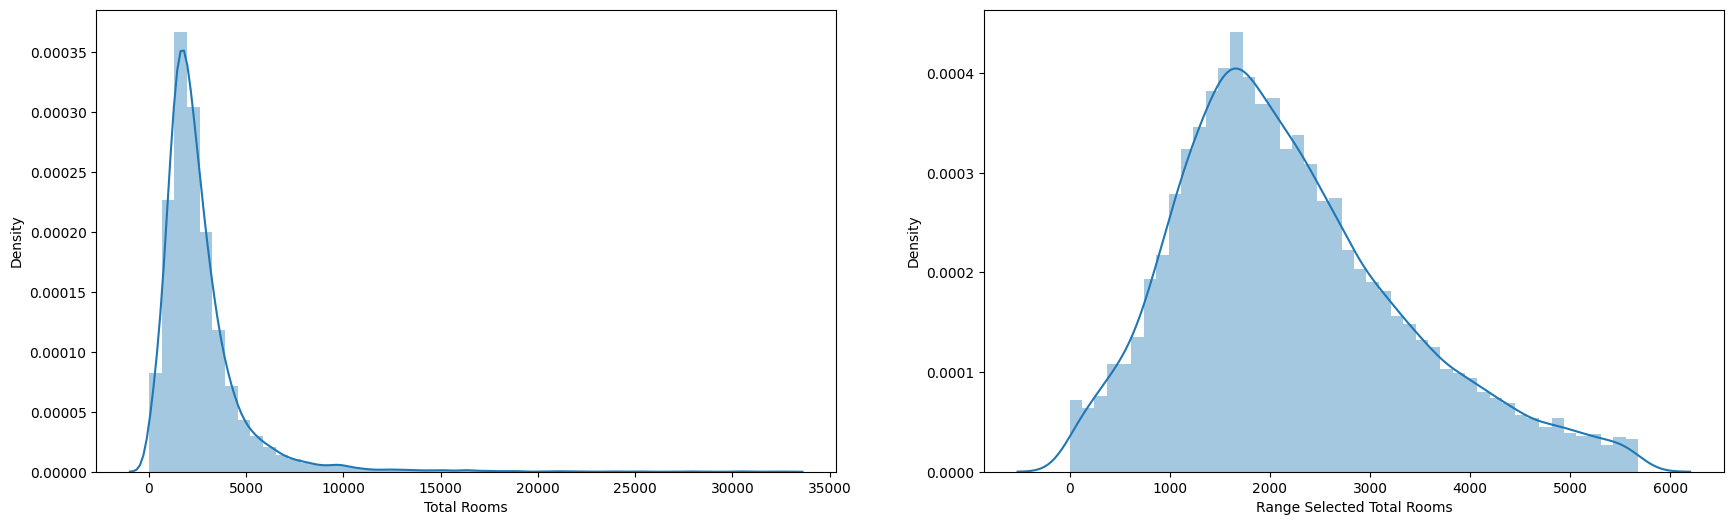

In [539]:
# Melakukan filtering pada data
df_model = df_model[(df_model['total_rooms'] <= 5677)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['total_rooms'], ax=axes[0])
sns.distplot(df_model['total_rooms'], ax=axes[1])
axes[0].set_xlabel('Total Rooms')
axes[1].set_xlabel('Range Selected Total Rooms');

In [540]:
# Cek deskriptif statistik kolom 'total_rooms' setelah filtering
df_model['total_rooms'].describe()

count    12720.000000
mean      2208.471934
std       1147.786958
min          2.000000
25%       1395.750000
50%       2016.000000
75%       2865.000000
max       5677.000000
Name: total_rooms, dtype: float64

**Total Bedrooms**

In [541]:
# Cek deskriptif statistik kolom total bedrooms
df_model['total_bedrooms'].describe()

count    12720.000000
mean       464.259748
std        252.844490
min          2.000000
25%        289.000000
50%        418.000000
75%        599.000000
max       2610.000000
Name: total_bedrooms, dtype: float64

In [542]:
# Cek total bedrooms > 1175
df_model[df_model['total_bedrooms'] > 1175].count()['total_rooms']

186

Terlihat bahwa 75% data memiliki total rooms < 601 kamar, sedangkan nilai maksimalnya adalah 2610. Terdapat 186 data yang memiliki jumlah kamar > 1175 kamar (batas atas berdasarkan metode IQR). Data outlier ini akan di drop dan tidak akan digunakan dalam pembuatan model

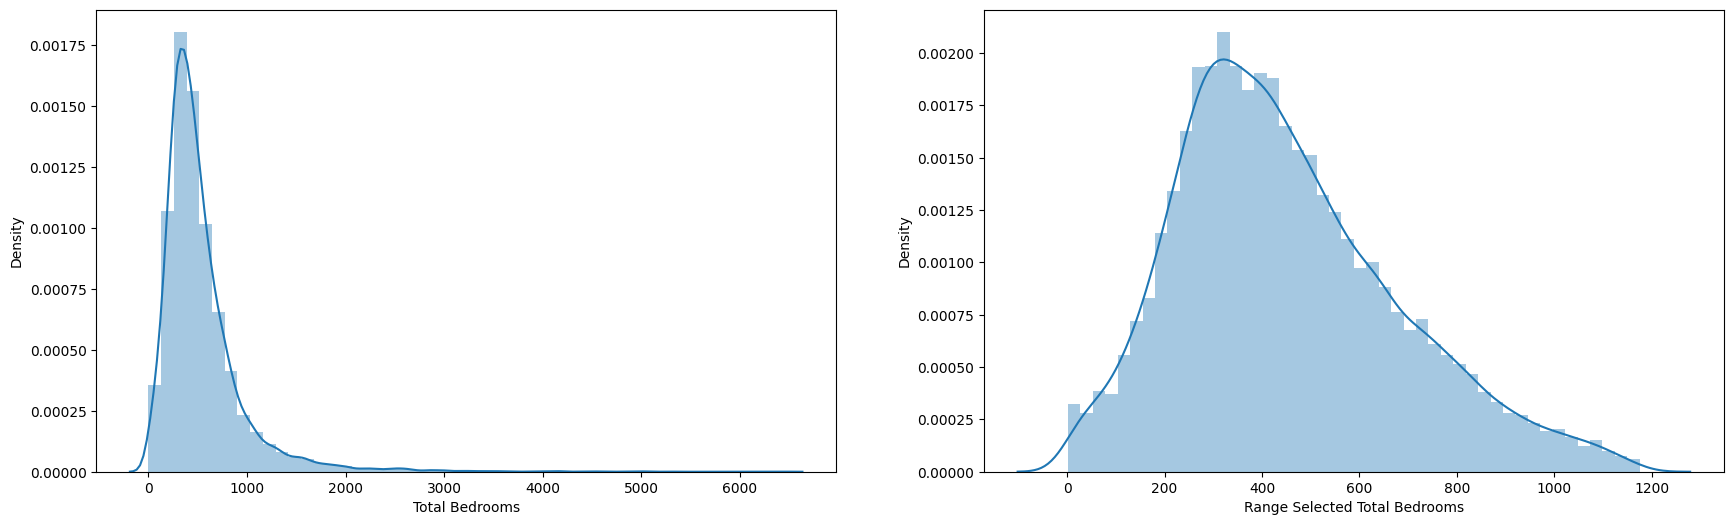

In [543]:
# Melakukan filtering pada data
df_model = df_model[(df_model['total_bedrooms'] <= 1175)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['total_bedrooms'], ax=axes[0])
sns.distplot(df_model['total_bedrooms'], ax=axes[1])
axes[0].set_xlabel('Total Bedrooms')
axes[1].set_xlabel('Range Selected Total Bedrooms');

In [544]:
# Cek deskriptif statistik kolom 'total_bedrooms' setelah filtering
df_model['total_bedrooms'].describe()

count    12534.000000
mean       450.773576
std        227.338765
min          2.000000
25%        287.000000
50%        415.000000
75%        588.000000
max       1175.000000
Name: total_bedrooms, dtype: float64

**Population**

In [545]:
# Cek deskriptif statistik kolom total bedrooms
df_model['population'].describe()

count    12534.000000
mean      1229.921494
std        674.502775
min          3.000000
25%        770.000000
50%       1122.000000
75%       1583.000000
max       8733.000000
Name: population, dtype: float64

In [546]:
# Cek total bedrooms > 1175
df_model[df_model['population'] > 3129].count()['population']

172

Terlihat bahwa 75% data memiliki population < 1585 dalam satu blok, sedangkan nilai maksimalnya adalah 8733. Terdapat 172 data yang memiliki populasi > 3129 (batas atas berdasarkan metode IQR). Data outlier ini akan di drop dan tidak akan digunakan dalam pembuatan model

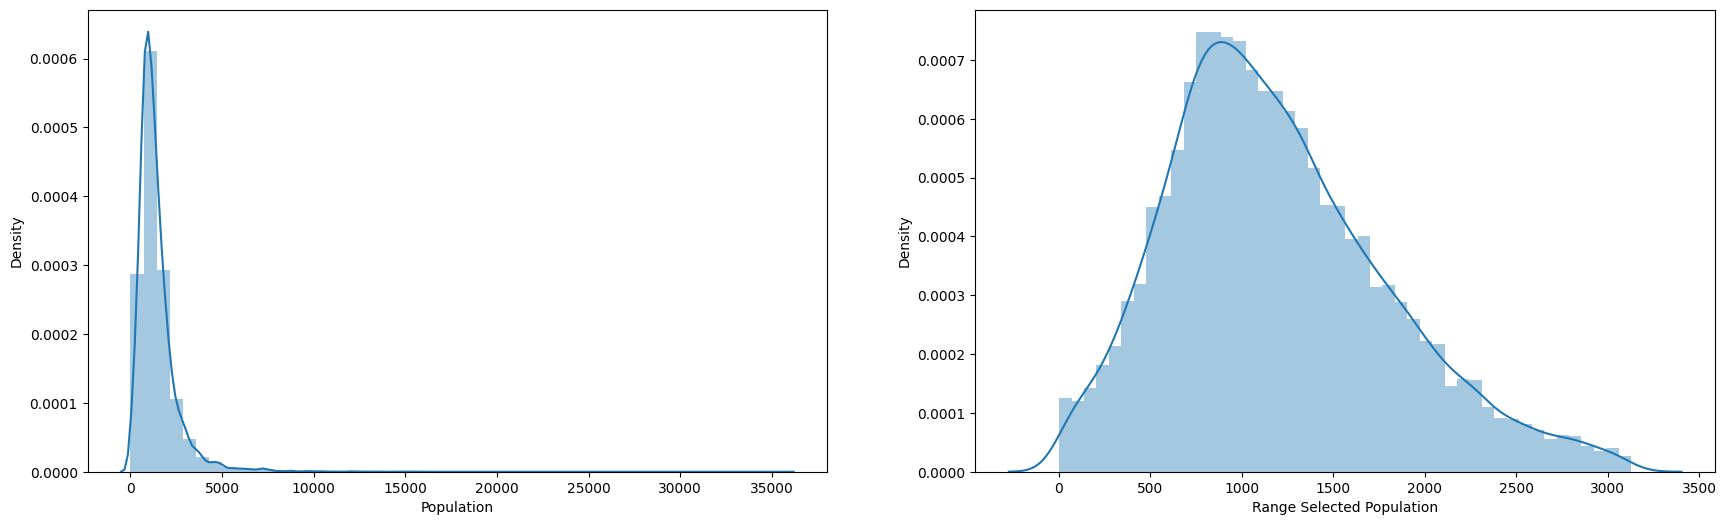

In [547]:
# Melakukan filtering pada data
df_model = df_model[(df_model['population'] <= 3129)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['population'], ax=axes[0])
sns.distplot(df_model['population'], ax=axes[1])
axes[0].set_xlabel('Population')
axes[1].set_xlabel('Range Selected Population');

In [548]:
# Cek deskriptif statistik kolom 'population' setelah filtering
df_model['population'].describe()

count    12362.000000
mean      1194.956560
std        602.844837
min          3.000000
25%        766.000000
50%       1110.000000
75%       1557.000000
max       3127.000000
Name: population, dtype: float64

**Households**

In [549]:
# Cek deskriptif statistik kolom total bedrooms
df_model['households'].describe()

count    12362.000000
mean       416.505420
std        205.940505
min          2.000000
25%        270.000000
50%        388.000000
75%        541.000000
max       1144.000000
Name: households, dtype: float64

In [550]:
# Cek total bedrooms > 1175
df_model[df_model['households'] > 1090].count()['households']

5

Terlihat bahwa 75% data memiliki households < 542, sedangkan nilai maksimalnya adalah 1144. Terdapat 5 data yang memiliki households > 1090 (batas atas berdasarkan metode IQR). Data outlier ini akan di drop dan tidak akan digunakan dalam pembuatan model

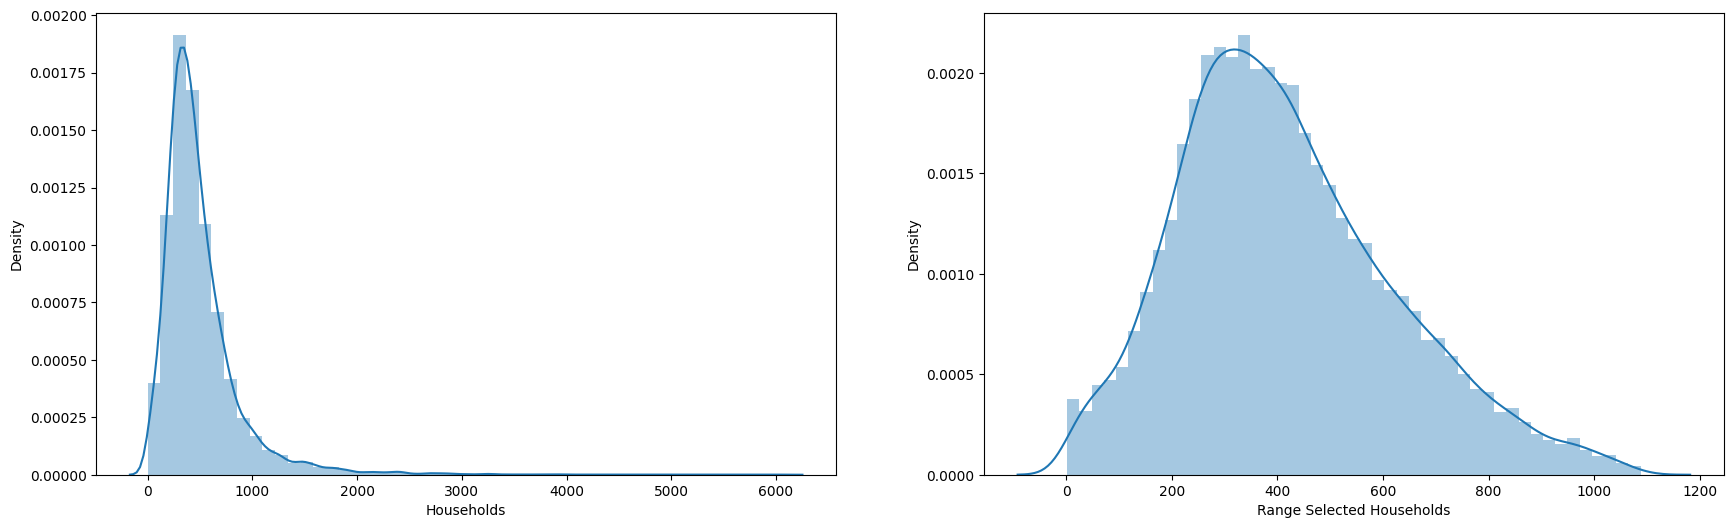

In [551]:
# Melakukan filtering pada data
df_model = df_model[(df_model['households'] <= 1090)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['households'], ax=axes[0])
sns.distplot(df_model['households'], ax=axes[1])
axes[0].set_xlabel('Households')
axes[1].set_xlabel('Range Selected Households');

In [552]:
# Cek deskriptif statistik kolom 'households' setelah filtering
df_model['households'].describe()

count    12357.000000
mean       416.223193
std        205.503110
min          2.000000
25%        270.000000
50%        388.000000
75%        541.000000
max       1088.000000
Name: households, dtype: float64

**Median Income**

In [553]:
# Cek deskriptif statistik kolom median income
df_model['median_income'].describe()

count    12357.000000
mean         3.625158
std          1.535119
min          0.499900
25%          2.500000
50%          3.411500
75%          4.520800
max         15.000100
Name: median_income, dtype: float64

In [554]:
# Cek median_income > $7.986
df_model[df_model['median_income'] > 7.986].count()['median_income']

126

Terlihat bahwa 75% data memiliki median_income < 4.52, sedangkan nilai maksimalnya adalah 15. Terdapat 126 data yang memiliki median_income > 7.986 (batas atas berdasarkan metode IQR). Data outlier ini akan di drop dan tidak akan digunakan dalam pembuatan model

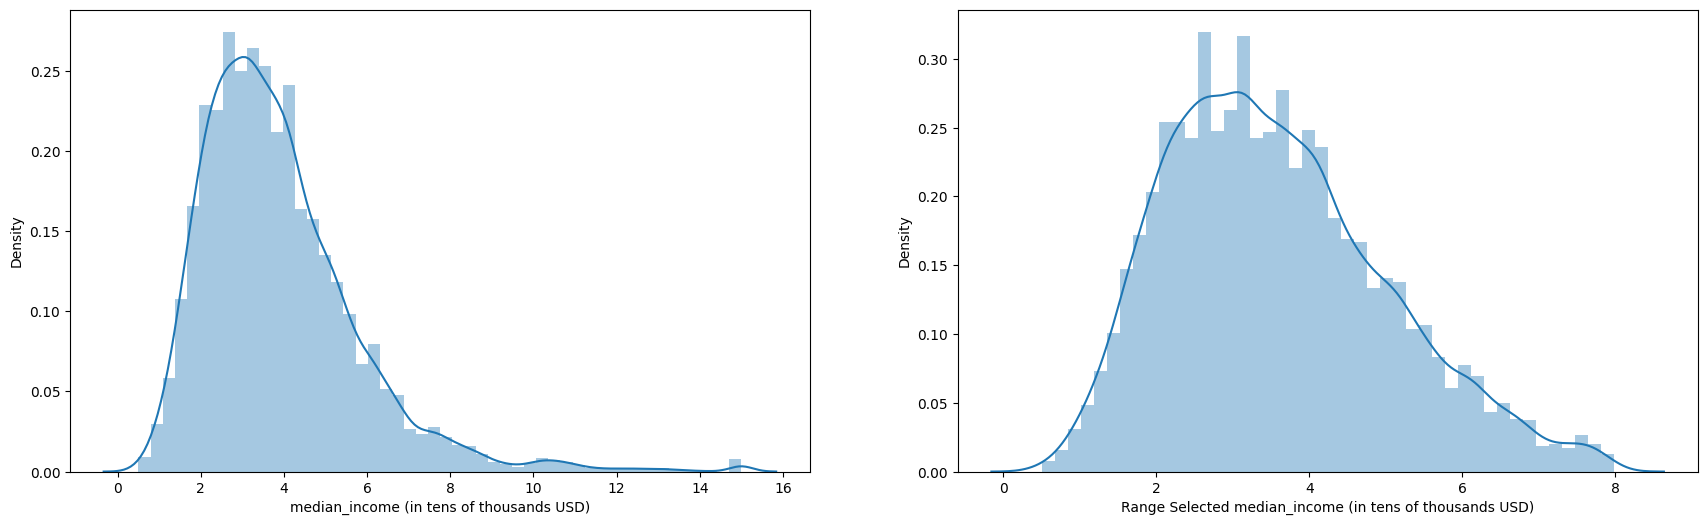

In [555]:
# Melakukan filtering pada data
df_model = df_model[(df_model['median_income'] <= 7.986)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_income'], ax=axes[0])
sns.distplot(df_model['median_income'], ax=axes[1])
axes[0].set_xlabel('median_income (in tens of thousands USD)')
axes[1].set_xlabel('Range Selected median_income (in tens of thousands USD)');

In [556]:
# Cek deskriptif statistik kolom 'households' setelah filtering
df_model['median_income'].describe()

count    12231.000000
mean         3.570443
std          1.439360
min          0.499900
25%          2.492550
50%          3.392200
75%          4.473200
max          7.979400
Name: median_income, dtype: float64

**Clean Dataset**

In [557]:
# Cek dataset yang sudah bersih
df_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
7,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586,INLAND,137000.0


In [558]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12231 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12231 non-null  float64
 1   latitude            12231 non-null  float64
 2   housing_median_age  12231 non-null  float64
 3   total_rooms         12231 non-null  float64
 4   total_bedrooms      12231 non-null  float64
 5   population          12231 non-null  float64
 6   households          12231 non-null  float64
 7   median_income       12231 non-null  float64
 8   ocean_proximity     12231 non-null  object 
 9   median_house_value  12231 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.0+ MB


Pada akhirnya, tersisa 12231 baris data yang akan digunakan untuk pemodelan. Ini berarti sekitar 15% dari total data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

### **Modeling**

In [559]:
# traintest split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

# Preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

# Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model. Disini, kita memiliki 1 kolom kategorikal yaitu `ocean_proximity`. Karena kolom `ocean_proximity` hanya memiliki 5 unique values (termasuk sedikit), maka kita akan menggunakan encoding tipe "One Hot Encoding"

**Scaling**

Kita juga akan menggunakan scaling pada fitur numerikal. Ini perlu dilakukan untuk memastikan kestabilan jika ada kolom numerikal dengan perbedaan skala. 

In [560]:
df_model['ocean_proximity'].value_counts()

<1H OCEAN     5260
INLAND        4083
NEAR OCEAN    1545
NEAR BAY      1341
ISLAND           2
Name: ocean_proximity, dtype: int64

In [561]:
transformer = ColumnTransformer(
    [
    ('OHE', OneHotEncoder(drop='first', handle_unknown='ignore'), ['ocean_proximity']),
    ('scaler', RobustScaler(), ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households',	'median_income']),
    ],remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['ocean_proximity']),
                                ('scaler', RobustScaler(),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income'])])

**Data Splitting**

In [562]:
# Splitting data training dan test dengan proporsi 70:30

x = df_model.drop(columns=['median_house_value'], axis=1)
y = df_model['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    random_state = 0
)

**Choose a Benchmark Model**

In [563]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
lasso = Lasso()
svr = SVR()

# Scaling data
scaler = RobustScaler()

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb, lasso, svr]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=5, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-58133.74605692 -57302.95710826 -58215.69020803 -57190.290772
 -58938.16484209] LinearRegression()
[-43350.12464945 -42409.22536762 -43523.5714024  -42738.22818608
 -44909.90460142] LinearRegression()
[-0.27625908 -0.27065148 -0.27096472 -0.27286286 -0.27755548] LinearRegression()
[-55350.79118091 -55745.26516183 -55789.33833784 -55187.47628672
 -57624.88157906] KNeighborsRegressor()
[-39009.08347928 -38531.95151869 -39646.88142523 -38727.46483645
 -40917.12686916] KNeighborsRegressor()
[-0.22638842 -0.23823682 -0.23937989 -0.23116633 -0.23637777] KNeighborsRegressor()
[-66772.97855794 -64682.07339603 -63881.39576317 -65367.62082869
 -68182.64858445] DecisionTreeRegressor(random_state=1)
[-45284.93870403 -43677.92114486 -42959.81366822 -44535.74766355
 -46559.11273364] DecisionTreeRegressor(random_state=1)
[-0.25733642 -0.26624897 -0.25294519 -0.26016747 -0.26146992] DecisionTreeRegressor(random_state=1)
[-47393.32772466 -47331.36405669 -46492.68617418 -45341.02080898
 -46674.98776113

In [564]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'Lasso Regressor', 'SVR'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-57956.169797,644.430902,-43386.210841,862.113096,-0.273659,0.002789
1,KNN Regressor,-55939.550509,873.258781,-39366.501626,862.048851,-0.234310,0.004859
2,DecisionTree Regressor,-65777.343426,1532.245986,-44603.506783,1253.137760,-0.259634,0.004414
3,RandomForest Regressor,-46646.677305,742.366006,-31960.558207,420.676542,-0.193480,0.005823
4,XGBoost Regressor,-45083.338316,734.190745,-30786.509151,328.756697,-0.186629,0.006902
5,Lasso Regressor,-57956.074956,644.706964,-43385.609295,862.359078,-0.273647,0.002787
6,SVR,-94879.891009,978.821555,-73794.650331,375.124083,-0.503439,0.014068


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, MAE, dan MAPE, XGBoost dan RandomForest adalah 2 model terbaik. 
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [565]:
# Benchmark 2 model terbaik
models = {
    'XGBoost': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGBoost,44069.521555,29723.511040,0.180789
RandomForest,46084.754077,30876.881041,0.186703


- Ketika dilakukan prediksi pada test set, performa XGBoost secara keseluruhan (dari nilai RMSE, MAE, MAPE) sedikit lebih baik dari RandomForest.


**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

Cari hyperparameter terbaik untuk KNN

In [566]:
# Melihat perameter XGBRegressor
?XGBRegressor

Init signature:
XGBRegressor(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid valu

In [567]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [568]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 200,
    cv = 5, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [569]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categorie

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHE',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income'])])),
                                             ('scaler', RobustScaler...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [570]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,3.111933,0.192275,0.039569,0.034051,0.9,0.059948,119,8,0.05,5,...,261.845629,1,-0.175663,-0.181106,-0.186488,-0.174710,-0.173809,-0.178355,0.004794,1
62,2.680683,0.112183,0.022150,0.002933,0.7,10.0,180,6,0.16,5,...,524.382224,2,-0.176758,-0.183926,-0.191456,-0.180881,-0.180703,-0.182745,0.004915,2
75,1.957305,0.054763,0.017442,0.000861,0.9,3.593814,152,5,0.18,2,...,258.514673,3,-0.183220,-0.185711,-0.189863,-0.185051,-0.181731,-0.185115,0.002755,6
181,2.023777,0.151952,0.035726,0.018626,0.7,10.0,131,8,0.16,10,...,535.253433,4,-0.186584,-0.187571,-0.189052,-0.180978,-0.180374,-0.184912,0.003552,5
81,2.686022,0.113036,0.018961,0.001664,0.9,0.464159,184,5,0.09,9,...,418.502124,6,-0.180772,-0.183774,-0.192156,-0.185361,-0.179943,-0.184401,0.004347,4


In [571]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -43769.178710108325
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [572]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,42865.422432,28765.118193,0.172615


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [573]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGBoost']).T

,RMSE,MAE,MAPE
XGBoost,44069.521555,29723.51104,0.180789


In [574]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,42865.422432,28765.118193,0.172615


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
(Angka dibawah akan berubah setiap kali code-nya di run karena dilakukan random iteration sebanyak 200x, akan tetapi nilainya tidak akan jauh dari satu sama lain)
- RMSE, MAE & MAPE sebelum tuning: 44069, 29723, 0.181
- RMSE, MAE & MAPE setelah tuning: 42865, 28765, 0.173

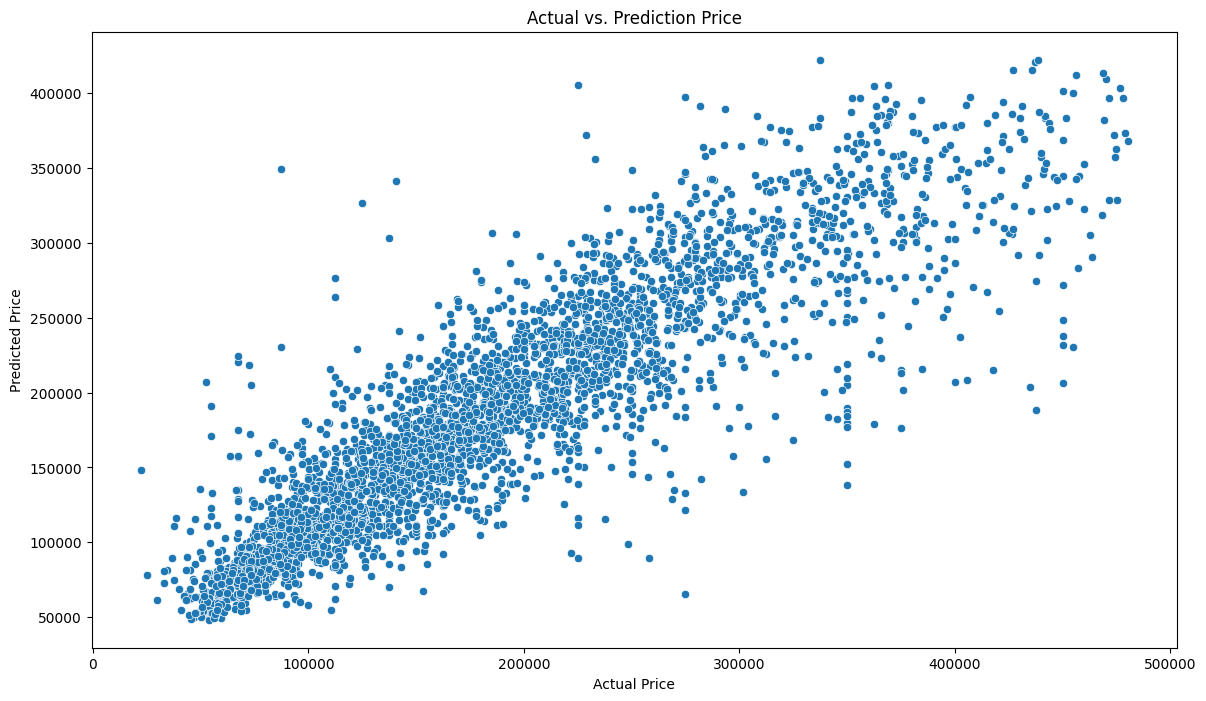

In [575]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Dilihat dari plot di atas, harga aktual dan harga prediksi bergerak secara linear dan monoton dari kiri bawah ke kanan atas. Mayoritas Error yang signifikan terlihat berada pada properti dengan median harga diatas USD 300,000. Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 18% menjadikan model ini dapat dikategorikan ke dalam **'good forecast'** (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

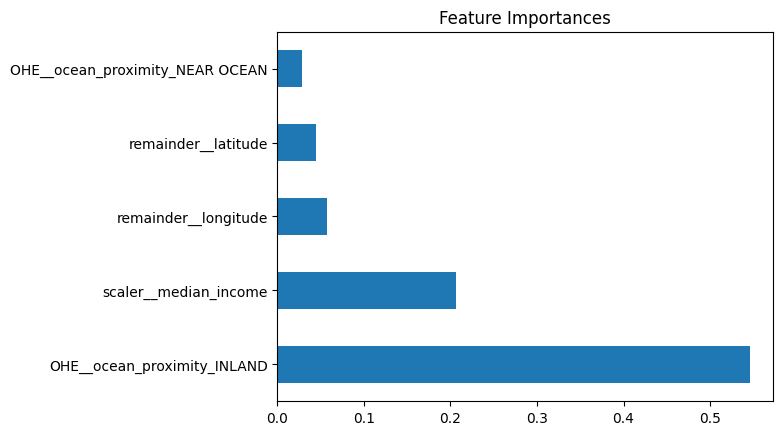

In [576]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

### **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'median_income' dan 'ocean_proximity' menjadi fitur yang paling berpengaruh terhadap 'median_house_value'.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~18%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan median house value di California pada rentang nilai seperti yang dilatih terhadap model (maksimal median house value USD 480275), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 18% dari harga seharusnya. 
 
 Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek properti dan juga services, seperti luas kamar, jarak ke pusat kota, akses ke transportasi umum, keadaan lingkungan sekitar (apakah dekat dengan mall atau tempat makan), seberapa jauh dari jalan tol, dll. 

### **Recommendations**


Sebagai data analyst, saya akan merekomendasikan kepada pemerintah untuk membuat sebuah website atau aplikasi sederhana yang berisikan informasi ter-update mengenai housing market di California. Website atau aplikasi ini akan berisikan peta interaktif dimana user akan disajikan fitur utama 'median_house_value' dan fitur-fitur pendukung lainnya, seperti 'populasi', 'jumlah kamar', 'jumlah keluarga' pada suatu blok perumahan tertentu. Fitur 'Median Value Rumah' akan berubah saat fitur-fitur pendukung lainnya berubah. 

Dengan adanya informasi ini, masyarakat California diharapkan dapat lebih teredukasi mengenai housing market. Masyarakat yang memiliki tujuan mencari rumah pertama ataupun berinvestasi dapat menggunakan informasi ini untuk membuat keputusan yang lebih baik dan bijak. Ini juga akan mendorong persaingan harga yang sehat antar pemilik rumah dan mencegah kenaikan harga yang berlebihan (mencegah inflasi)

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Dataset merupakan data yang dikumpulkan pada tahun 1990 (sekitar 30 tahun yang lalu), jadi value rumah di California untuk saat ini pastinya sudah bertumbuh dengan inflasi, jadi sebaiknya median_house_value di update sesuai dengan valuasi terbaru tahun ini. 
<br><br> 
2. Jika memungkinkan, penambahan fitur yang memiliki korelasi yang kuat dengan target ('median_housing_value'), seperti jarak dari transportasi umum terdekat atau luas kamar/bangunan. 
<br><br>   
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.
<br><br>   
  
